# Juego de La Vida de Conway


## El presente trabajo contiene una Simulacion del Juego de la Vida

### Ing. Sistemas
### Simulacion
#### Pedro Bermeo

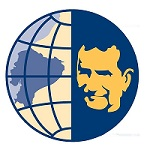


* ***Historia***


El juego de la vida es un autómata celular diseñado por el matemático británico John Horton Conway en 1970. 
Hizo su primera aparición pública en el número de octubre de 1970 de la revista Scientific American, en la columna de juegos matemáticos de Martin Gardner. Desde un punto de vista teórico, es interesante porque es equivalente a una máquina universal de Turing, es decir, todo lo que se puede computar algorítmicamente se puede computar en el juego de la vida. 
Desde su publicación, ha atraído mucho interés debido a la gran variabilidad de la evolución de los patrones. Se considera que la vida es un buen ejemplo de emergencia y auto organización. Es interesante para los científicos, matemáticos, economistas y otros observar cómo patrones complejos pueden provenir de la implementación de reglas muy sencillas. 
La vida tiene una variedad de patrones reconocidos que provienen de determinadas posiciones iniciales. Poco después de la publicación, se descubrieron el pentaminó R, el planeador o caminador (en inglés, glider, conjunto de células que se desplazan) y el explosionador (células que parecen formar la onda expansiva de una explosión), lo que atrajo un mayor interés hacia el juego. Contribuyó a su popularidad el hecho de que se publicó justo cuando se estaba lanzando al mercado una nueva generación de miniordenadores baratos, lo que significaba que se podía jugar durante horas en máquinas que, por otro lado, no se utilizarían por la noche. 
Para muchos aficionados, el juego de la vida solo era un desafío de programación y una manera divertida de usar ciclos de la CPU. Para otros, sin embargo, el juego adquirió más connotaciones filosóficas. Desarrolló un seguimiento casi fanático a lo largo de los años 1970 hasta mediados de los 80. 


* ***Reglas de juego***

Este es un juego de cero jugadores, lo que significa que no es necesaria la interacción de ninguna persona, ya que su desarrollo está determinado por la configuración inicial.

El juego se desarrolla por turnos: en cada turno se examinan todas las casillas del tablero y se calcula cual será su estado en el siguiente turno. Finalmente, cuando ya se han calculado todos los estados, se actualiza el tablero.

El estado que tendrá una casilla en el siguiente turno se calcula siguiendo 3 reglas muy simples pero que, sorprendentemente, pueden dar lugar a situaciones de enorme complejidad:

    1. Si una casilla está ocupada y el número de casillas adyacentes también ocupadas es menor que 2, la célula muere por aislamiento y se retira del tablero en la siguiente generación.
    2. Si una casilla está ocupada y el número de células que la rodean es mayor que 3, la célula muere por superpoblación (se quita del tablero en el siguiente turno).
    Una casilla libre que tenga 3 (y sólo 3) células adyacentes da lugar a una célula viva en el siguiente turno.



* ***Resultados esperados***


 * Con la ejecucion del Juego de la vida, pretendo descubirir con diferentes patrones de entrada ver cual es la diferencia para la supervivencia de cada celda inicial establecida.
 * Determinar cual es el patron que mas celdas sobrevivientes me da al final de la ejecucion.
 * A partir de un patron inicial que consiste en el uso de dos cruces situadas una en frente de otra, determinar si se genera un oscilador.
 
 
 



Cuando se ejecuta eljuego de la vida, obtenemos los siguientes resultados, en los que se puede apreciar la presencia de un Oscilador.

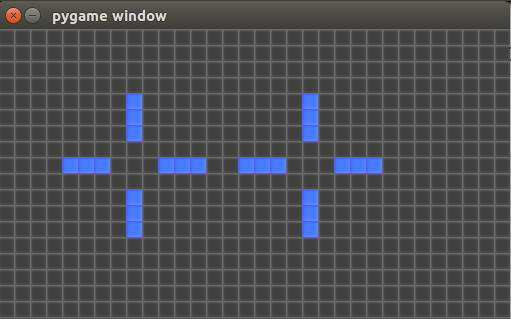




In [ ]:
from collections import OrderedDict
import pygame, random
from pygame.locals import *

pygame.init()

speed = 10  # how many iterations per second
squares = 1  # size of squares: 0 = 8X8, 1 = 16X16, 2 = 32X32, 3 = 64X64
map_size = 32  # the width and height

if squares == 0:
    imgs = ["res/alive_8.png", "res/dead_8.png", 8]
if squares == 1:
    imgs = ["res/alive_16.png", "res/dead_16.png", 16]
if squares == 2:
    imgs = ["res/alive_32.png", "res/dead_32.png", 32]
if squares == 3:
    imgs = ["res/alive_64.png", "res/dead_64.png", 64]

# -----CONFIG-----

width = map_size * imgs[2]
height = map_size * imgs[2]
screen_size = width, height
screen = pygame.display.set_mode(screen_size)
clock = pygame.time.Clock()
alive = pygame.image.load(imgs[0]).convert()
dead = pygame.image.load(imgs[1]).convert()
done = False


class cell:

    def __init__(self, location, alive=False):
        self.to_be = None
        self.alive = alive
        self.pressed = False
        self.location = location


class board:

    def __init__(self):
        self.map = []

    def fill(self, ran):
        for i in range(map_size):
            self.map.append([])
            for g in range(map_size):
                if ran == True:
                    a = random.randint(0, 4)
                    if a == 0:
                        self.map[i].insert(g, cell((i, g), True))
                    else:
                        self.map[i].insert(g, cell((i, g)))
                else:
                    self.map[i].insert(g, cell((i, g)))

    def draw(self):
        for i in range(map_size):
            for g in range(map_size):
                cell = self.map[i][g]
                loc = cell.location
                if cell.alive == True:
                    screen.blit(alive, (loc[0] * imgs[2], loc[1] * imgs[2]))
                else:
                    screen.blit(dead, (loc[0] * imgs[2], loc[1] * imgs[2]))

    def get_cells(self, cell):  # gets the cells around a cell
        mapa = self.map
        a = []
        b = []
        c = 0
        cell_loc = cell.location
        try:
            a.append(mapa[abs(cell_loc[0] - 1)][abs(cell_loc[1] - 1)].location)
        except Exception:
            pass
        try:
            a.append(mapa[abs(cell_loc[0])][abs(cell_loc[1] - 1)].location)
        except Exception:
            pass
        try:
            a.append(mapa[abs(cell_loc[0] + 1)][abs(cell_loc[1] - 1)].location)
        except Exception:
            pass
        try:
            a.append(mapa[abs(cell_loc[0] - 1)][abs(cell_loc[1])].location)
        except Exception:
            pass
        try:
            a.append(mapa[abs(cell_loc[0] + 1)][abs(cell_loc[1])].location)
        except Exception:
            pass
        try:
            a.append(mapa[abs(cell_loc[0] - 1)][abs(cell_loc[1] + 1)].location)
        except Exception:
            pass
        try:
            a.append(mapa[abs(cell_loc[0])][abs(cell_loc[1] + 1)].location)
        except Exception:
            pass
        try:
            a.append(mapa[abs(cell_loc[0] + 1)][abs(cell_loc[1] + 1)].location)
        except Exception:
            pass
        num = len(list(OrderedDict.fromkeys(a)))  # removes duplicates
        for i in range(len(a)): b.append(mapa[a[i][0]][a[i][1]].alive)
        for i in b:  # c houses how many cells are alive around it
            if i == True: c += 1
        if cell.alive == True:  # rules
            if c < 2: cell.to_be = False
            if c > 3: cell.to_be = False
        else:
            if c == 3: cell.to_be = True
        # rules

    def update_frame(self):
        for i in range(map_size):
            for g in range(map_size):
                cell = self.map[i][g]
                self.get_cells(cell)

    def update(self):
        for i in range(map_size):
            for g in range(map_size):
                cell = self.map[i][g]
                loc = cell.location
                if cell.to_be != None: cell.alive = cell.to_be
                if self.map[i][g].alive == True:
                    screen.blit(alive, (loc[0] * imgs[2], loc[1] * imgs[2]))
                else:
                    screen.blit(dead, (loc[0] * imgs[2], loc[1] * imgs[2]))
                cell.to_be = None


def cell_list():
    lst = []
    for i in range(map_size):
        lst.append([])
        for g in range(map_size): lst[i].append(
            (board.map[i][g].location[0] * imgs[2], board.map[i][g].location[1] * imgs[2]))
    return lst


board = board()
board.fill(False)
board.draw()
tp = 0
run = False

while done == False:
    milliseconds = clock.tick(60)
    seconds = milliseconds / 1000.0
    tp += milliseconds

    for event in pygame.event.get():
        if event.type == QUIT:
            done = True

        if event.type == KEYDOWN:
            if event.key == K_SPACE:
                run = not run

        if event.type == KEYUP:
            if event.key == K_q:
                run = False
                board.update_frame()
                board.update()

        if event.type == MOUSEBUTTONUP:
            for i in range(map_size):
                for g in range(map_size):
                    board.map[i][g].pressed = False

    pressed = pygame.key.get_pressed()
    mouse = pygame.mouse.get_pressed()
    pos = pygame.mouse.get_pos()

    if pressed[K_r]:
        board.map = []
        board.fill(False)
        board.draw()
    if pressed[K_a]:
        board.map = []
        board.fill(True)
        board.draw()

    if run == True and tp >= 1000 / speed:
        tp = 0
        board.update_frame()
        board.update()

    if mouse[0]:  # makes cells alive
        rects = cell_list()
        for i in range(map_size):
            for g in range(map_size):
                if pos[0] >= rects[i][g][0] and pos[0] < rects[i][g][0] + imgs[2] and pos[1] >= rects[i][g][1] and pos[
                    1] < rects[i][g][1] + imgs[2] and board.map[i][g].pressed == False:
                    board.map[i][g].alive = True
                    board.map[i][g].pressed = True
                    board.update()

    if mouse[2]:  # kills cells
        rects = cell_list()
        for i in range(map_size):
            for g in range(map_size):
                if pos[0] >= rects[i][g][0] and pos[0] < rects[i][g][0] + imgs[2] and pos[1] >= rects[i][g][1] and pos[
                    1] < rects[i][g][1] + imgs[2] and board.map[i][g].pressed == False:
                    board.map[i][g].alive = False
                    board.map[i][g].pressed = False
                    board.update()

    pygame.display.flip()

pygame.quit()


### Referencias:
1.  Jose Rodríguez. (2018). El Juego de la Vida de Conway. 23/04/2019, de Boriel Sitio web: https://boriel.com/es/lab/el-juego-de-la-vida-de-conway/
2.  Stephane Beniak. (2012). Gamedevelopment Creando vida: el juego de la vida de Conway. 23/04/2019, de envato-tuts+ Sitio web: https://gamedevelopment.tutsplus.com/es/tutorials/creating-life-conways-game-of-life--gamedev-558
3.  Izhikevich, E. M., Conway, J. H., & Seth, A. (2015). Game of life. Scholarpedia, 10(6), 1816.
4.  Weisbuch, G. (2018). 4-3 Conway's" Game of Life": The game of life is based on a very simple cellular automaton which exhibits surpris-ingly diverse dynamical behaviors as a function of different initial configurations. This behavioral richness has made it popular in mathematical games and elemen-tary programs for novice computer users. The motivations of its author, Conway, are similar to those of von Neumann. We will not describe von Neumann's model. In Complex Systems Dynamics (pp. 56-57). CRC Press.
5.  Caballero, L., Hodge, B., & Hernandez, S. (2016). Conway's “Game of Life” and the Epigenetic Principle. Frontiers in cellular and infection microbiology, 6, 57.